K-Nearest Neighbors (KNN): การแบ่งคลาสแบบวิธีการเพื่อนบ้านใกล้ที่สุด

k Nearest Neighbors (kNN) คือการกำหนดข้อมูลกลุ่มชนิดเดียวกันให้มาอยู่รวมกัน
เป็นอัลกอริทึมที่สามารถนำมาช่วยแก้ปัญหาการจำแนกข้อมูล ใช้ในการวิเคราะห์ข้อมูลและจำแนกข้อมูล โดยอาศัยหลักการของการหาสัมประสิทธิ์ของสมการเพื่อสร้างเส้นแบ่งแยกกลุ่มข้อมูลที่ถูกป้อนเข้าสู่กระบวนการสอนให้ระบบเรียนรู้ โดยเน้นไปยังเส้นแบ่งแยกแยะกลุ่มข้อมูลได้ดีที่สุด

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#pip install openpyxl

In [74]:
df = pd.read_csv('breast-cancer.csv') #.dropna()
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
df.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [77]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [78]:
df = df.round(2)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,...,25.74,39.42,184.60,1821.0,0.16,0.87,0.94,0.26,0.41,0.12


In [79]:
X = df.iloc[:, 2:6] #.values 
y = df.iloc[:, 1] #.values 

In [80]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0
...,...,...,...,...
564,21.56,22.39,142.00,1479.0
565,20.13,28.25,131.20,1261.0
566,16.60,28.08,108.30,858.1
567,20.60,29.33,140.10,1265.0


In [81]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [83]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean
9,12.46,24.04,83.97,475.9
435,13.98,19.62,91.12,599.5
255,13.96,17.05,91.43,602.4
278,13.59,17.84,86.24,572.3
225,14.34,13.47,92.51,641.2
...,...,...,...,...
347,14.76,14.74,94.87,668.7
452,12.00,28.23,76.77,442.5
337,18.77,21.43,122.90,1092.0
563,20.92,25.09,143.00,1347.0


In [84]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict.reshape(-1,1)


array([['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
      

In [85]:
#การบันทึกเก็บโมเดลไปใช้งานบนระบบดิจิทัล
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'cancer_model.pkl')
model = joblib.load('cancer_model.pkl')

In [86]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.0,0.12,0.28,0.35,0.15,...,25.74,39.42,184.60,1821.0,0.16,0.87,0.94,0.26,0.41,0.12


In [64]:
radius_mean = float(input("Enter radius_mean: "))
texture_mean = float(input("Enter texture_mean: "))
perimeter_mean = float(input("Enter perimeter_mean: "))
area_mean = float(input("Enter area_mean: "))

In [65]:
result = model.predict([[radius_mean, texture_mean, perimeter_mean, area_mean]])
print("ผลการตรวจมะเร็งเต้านมพบว่ามีค่าเป็น:", result, "(M: Malignant = เป็นมะเร็ง, B: Benign = ปกติ ไม่เป็นมะเร็ง)")

ผลการตรวจมะเร็งเต้านมพบว่ามีค่าเป็น: ['M'] (M: Malignant = เป็นมะเร็ง, B: Benign = ปกติ ไม่เป็นมะเร็ง)


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [87]:
#การป้อนข้อมูลพยากรณ์
pred1 = [[17.99,10.38,122.80,1001.0],
         [7.76,24.54,47.92,181.0]]
         
dn = model.predict(pred1)

i = 1
for m in range(len(dn)):
    print('%d' %i, dn[m])
    i += 1

1 M
2 B


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [88]:
ypred = pd.DataFrame(y_predict)
data = ypred.rename(columns={0:'ข้อมูลพยากรณ์'})
data 

,ข้อมูลพยากรณ์
0,B
1,B
2,M
3,B
4,B
...,...
166,B
167,B
168,M
169,B


In [89]:
ytest = pd.DataFrame(y_test).reset_index()
data2 = ytest.rename(columns={'diagnosis':'ข้อมูลจริง'})
dt = data2.drop(['index'], axis=1) #ลบคอลัมน์ index
dt

,ข้อมูลจริง
0,B
1,M
2,M
3,M
4,B
...,...
166,B
167,B
168,B
169,B


In [90]:
#ตารางเปรียบเทียบข้อมูลจริงและการพยากรณ์
#total.to_csv('data.csv')
#total.to_excel('data.xlsx')

total = pd.concat([dt,data],axis=1) #.round(0)
total

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,B,B
1,M,B
2,M,M
3,M,B
4,B,B
...,...,...
166,B,B
167,B,B
168,B,M
169,B,B


In [91]:
Xtest = X_test.reset_index()
ds = Xtest.drop(['index'], axis=1) #ลบคอลัมน์ index
sum = pd.concat([ds, total],axis=1) #.round(0)
sum

,radius_mean,texture_mean,perimeter_mean,area_mean,ข้อมูลจริง,ข้อมูลพยากรณ์
0,11.60,12.84,74.34,412.6,B,B
1,13.00,21.82,87.50,519.8,M,B
2,15.46,11.89,102.50,736.9,M,M
3,14.90,22.53,102.10,685.0,M,B
4,13.62,23.23,87.19,573.2,B,B
...,...,...,...,...,...,...
166,13.05,19.31,82.61,527.2,B,B
167,9.88,19.40,63.95,298.3,B,B
168,14.40,26.99,92.25,646.1,B,M
169,13.14,20.74,85.98,536.9,B,B


#### การสร้างไดอะแกรม KNeighbors ประเมินความแม่นยำในการพยากรณ์

In [92]:
class_names = df['diagnosis'].unique()
class_names

array(['M', 'B'], dtype=object)

Accuracy Score: 0.88
              precision    recall  f1-score   support

           M       0.87      0.93      0.90        95
           B       0.90      0.83      0.86        76

    accuracy                           0.88       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171

[[88  7]
 [13 63]]


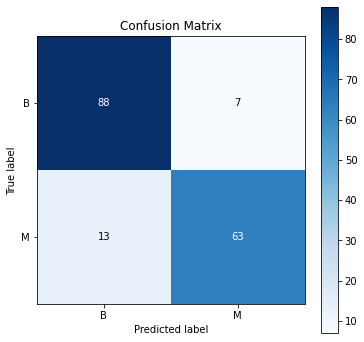

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_predict, target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()